In [1]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Target looks like regression


c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


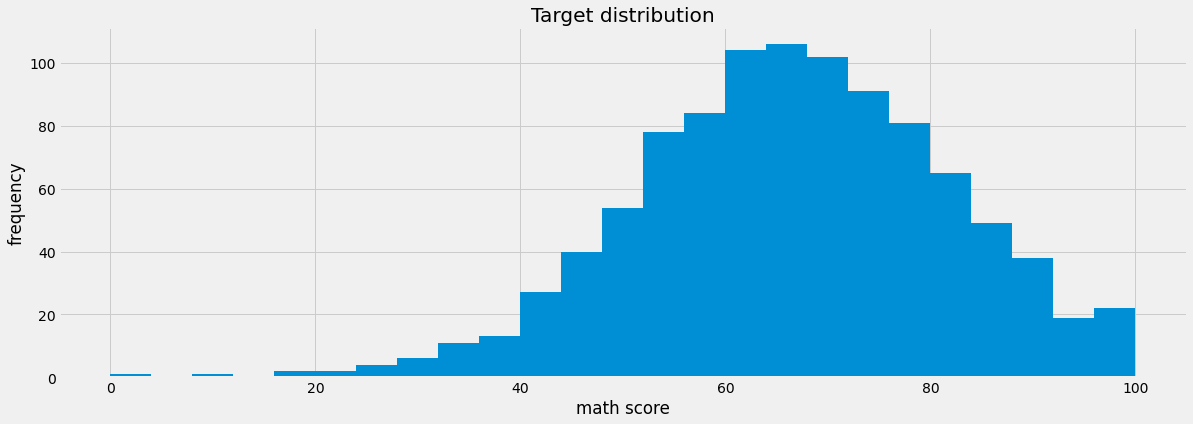

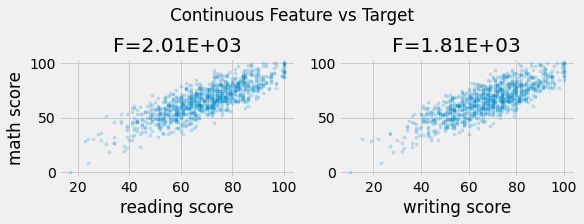

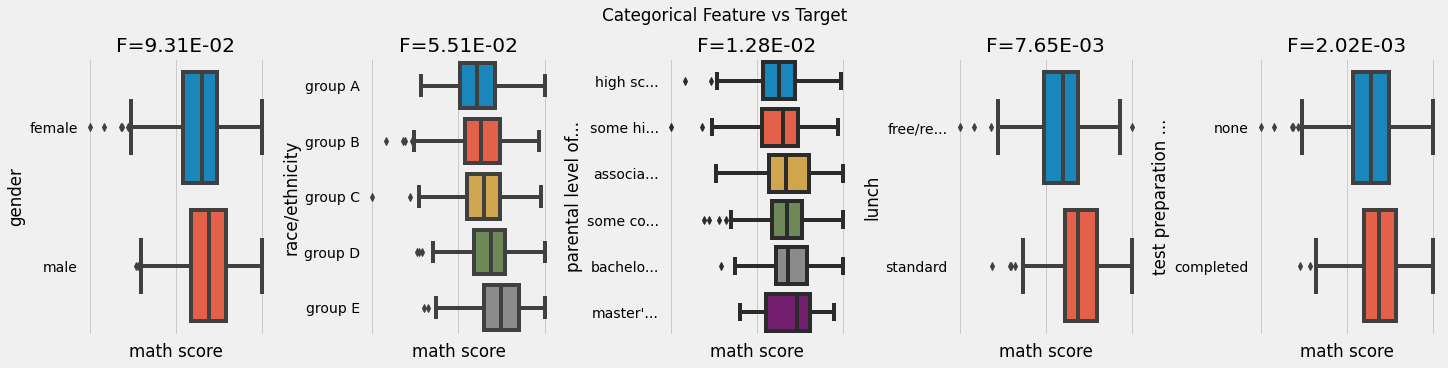

In [6]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

In [7]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')
data.groupby(['gender']).agg(['min', 'median', 'max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [8]:
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


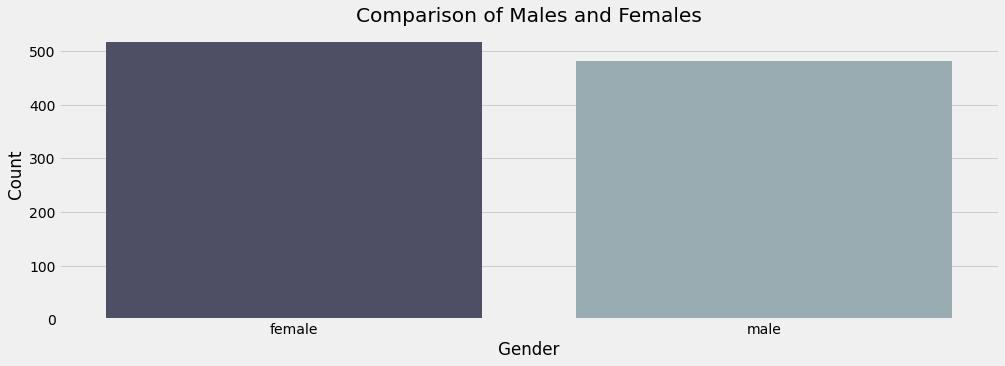

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
data['parental level of education']

c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


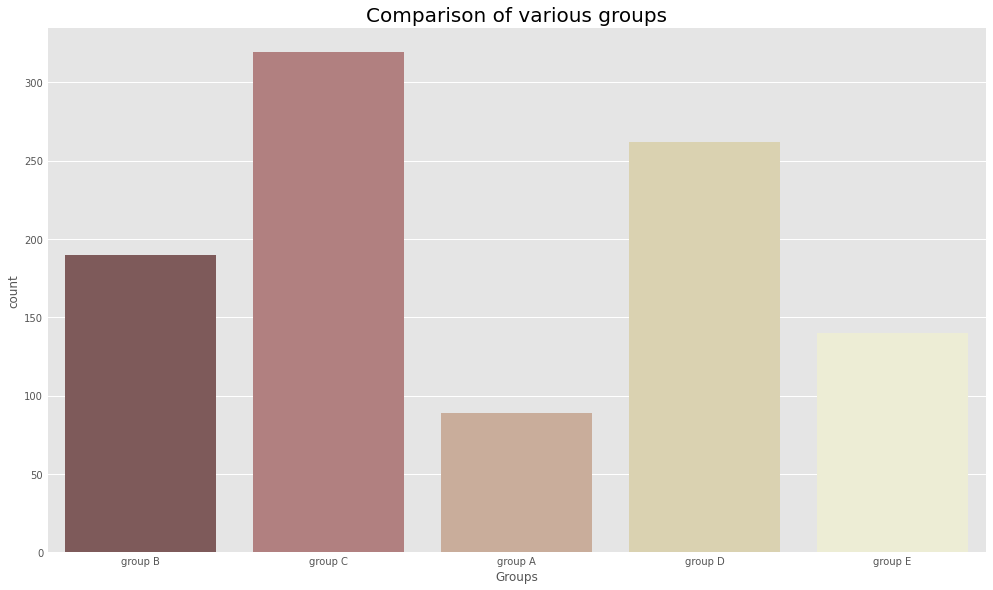

In [10]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


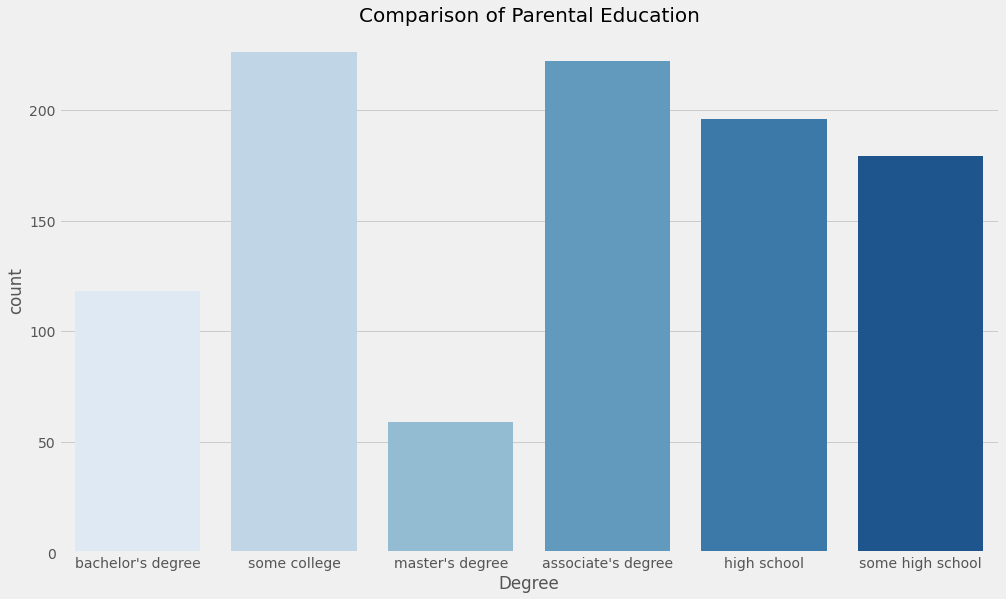

In [11]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

c:\users\tompe\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


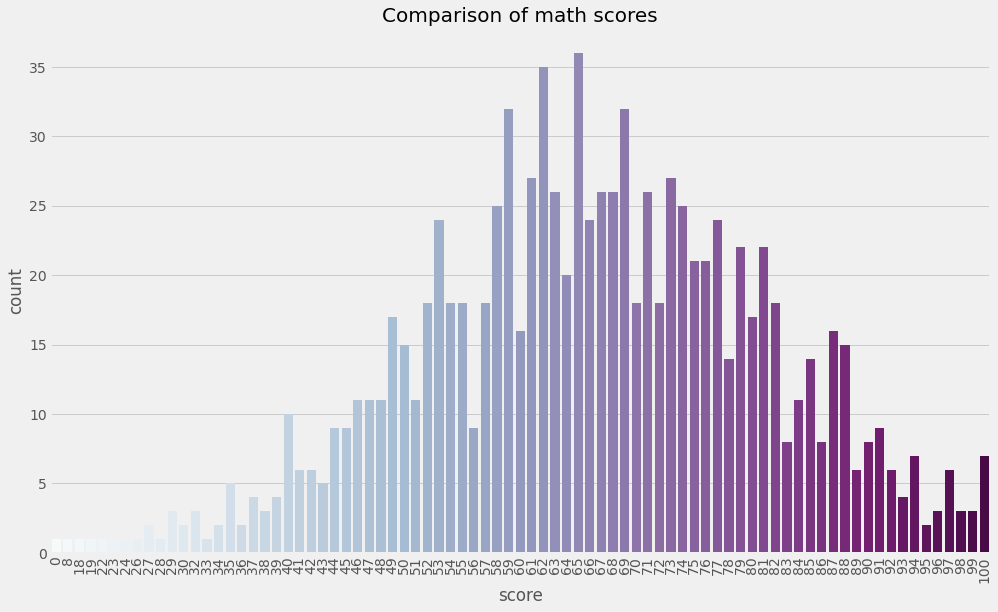

In [12]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

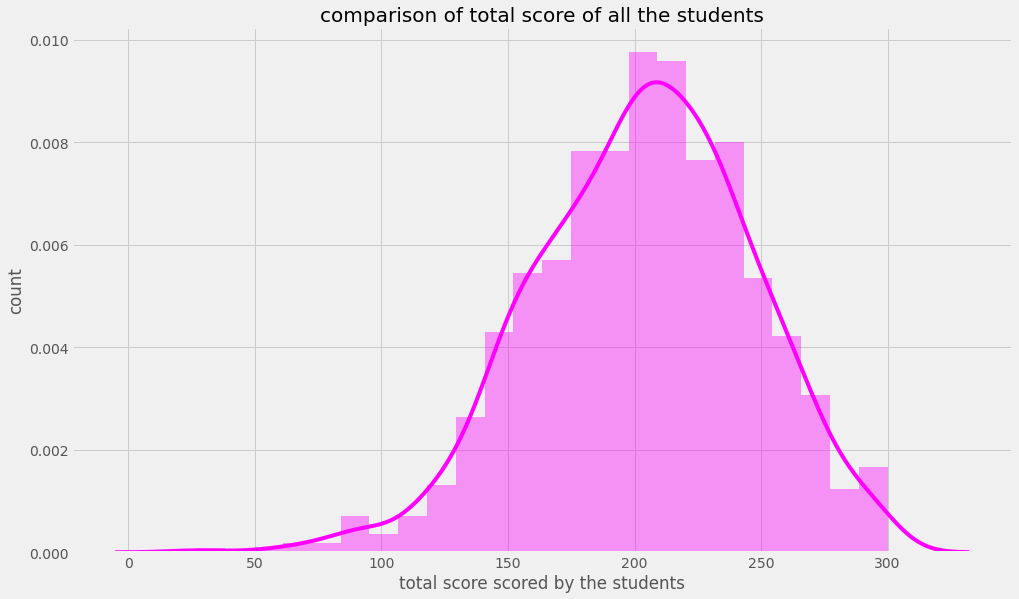

In [13]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

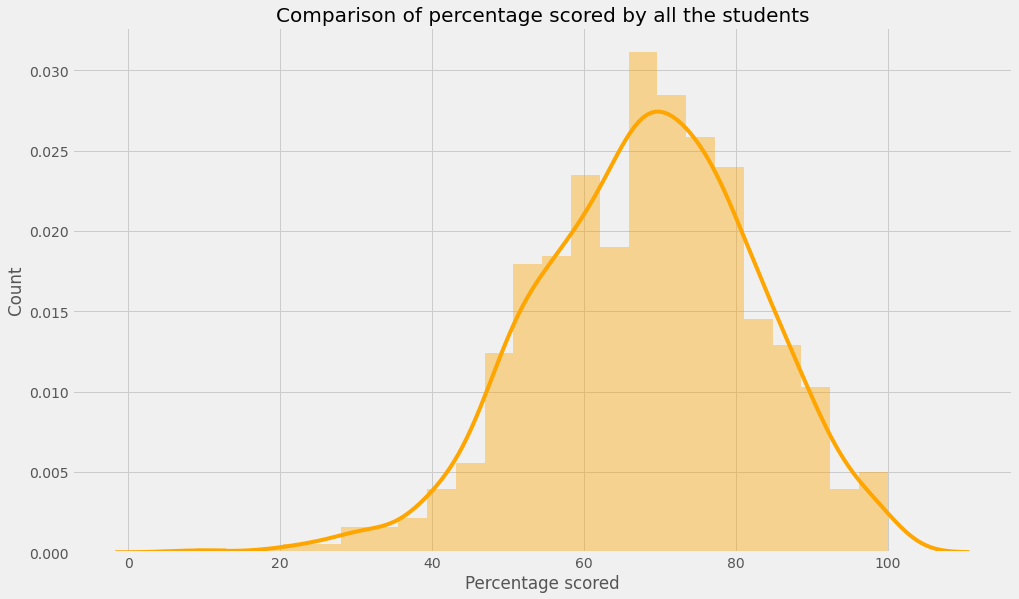

In [14]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3


data['math_status'] = np.where(data['math score'] < 40, 'Fail', 'Pass')
data['reading_status'] = np.where(data['reading score'] < 40, 'Fail', 'Pass')
data['writing_status'] = np.where(data['writing score'] < 40, 'Fail', 'Pass')
data['status'] = data.apply(lambda x: 'Fail' if x['math_status'] == 'Fail' or
                                                      x['reading_status'] == 'Fail' or
                                                      x['writing_status'] == 'Fail'
                                                    else 'Pass', axis=1)
# Checking students Over all pass status
data['status'].value_counts()

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [15]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'F'
  if(percentage >= 90):
    return 'A'
  if(percentage >= 80):
    return 'B'
  if(percentage >= 70):
    return 'C'
  if(percentage >= 60):
    return 'D'
  if(percentage >= 40):
    return 'E'
  else :
    return 'F'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

C    260
D    252
E    223
B    156
A     58
F     51
Name: grades, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])

In [17]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

In [18]:
data['parental level of education'] = data['parental level of education'].replace("master's degree", 1)
data['parental level of education'] = data['parental level of education'].replace("bachelor's degree", 2)
data['parental level of education'] = data['parental level of education'].replace("associate's degree", 3)
data['parental level of education'] = data['parental level of education'].replace("some college", 4)
data['parental level of education'] = data['parental level of education'].replace("some high school", 5)
data['parental level of education'] = data['parental level of education'].replace("high school", 6)

In [19]:
data['lunch'] = le.fit_transform(data['lunch'])

In [20]:
data['test preparation course'] = data['test preparation course'].replace('none', 0)
data['test preparation course'] = data['test preparation course'].replace('completed', 1)

In [21]:
data['math_status'] = le.fit_transform(data['math_status'])
data['reading_status'] = le.fit_transform(data['reading_status'])
data['writing_status'] = le.fit_transform(data['writing_status'])
data['status'] = le.fit_transform(data['status'])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,math_status,reading_status,writing_status,status,grades
0,0,2,2,1,0,72,72,74,218,73.0,1,1,1,1,C
1,0,3,4,1,1,69,90,88,247,83.0,1,1,1,1,B
2,0,2,1,1,0,90,95,93,278,93.0,1,1,1,1,A
3,1,1,3,0,0,47,57,44,148,50.0,1,1,1,1,E
4,1,3,4,1,0,76,78,75,229,77.0,1,1,1,1,C


In [22]:
x = data.iloc[:,:14]
y = data.iloc[:,14]
print(x.shape, y.shape)

(1000, 14) (1000,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(750, 14) (250, 14)
(750,) (250,)


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# creating an analysis model
pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# creating an analysis model
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.984


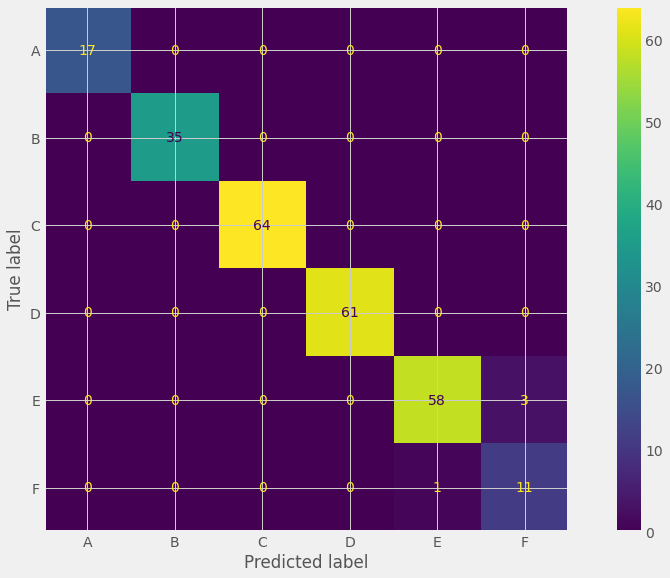

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test, y_test)
plt.show()

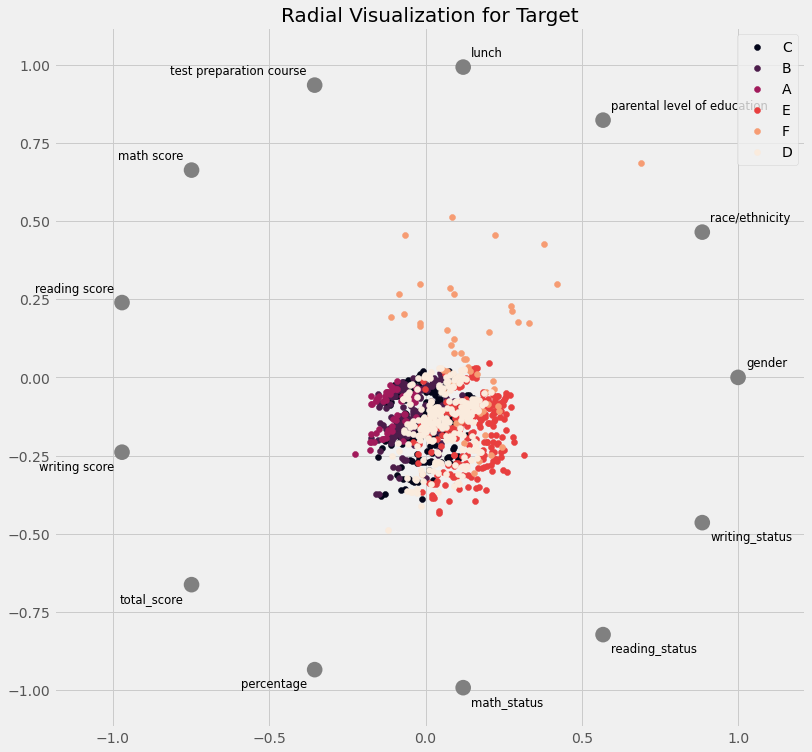

In [27]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()